In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
x = np.array([1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22])
y = np.array([100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100])

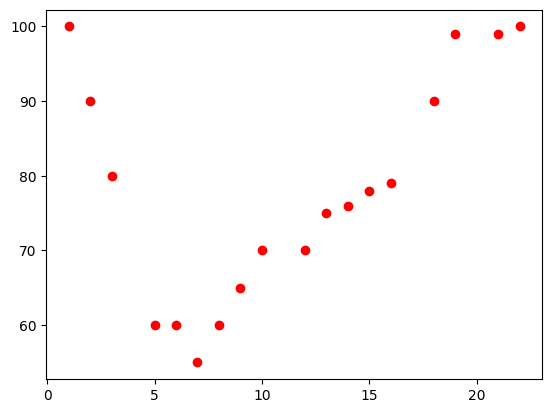

In [4]:
plt.scatter(x, y, color='red');

In [5]:
x_sqr_x = x.reshape(-1, 1)
x_sqr_x

array([[ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [12],
       [13],
       [14],
       [15],
       [16],
       [18],
       [19],
       [21],
       [22]])

In [8]:
x_sqr_x = np.concatenate([x_sqr_x, x_sqr_x ** 2], axis=1)
x_sqr_x

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100],
       [ 12, 144],
       [ 13, 169],
       [ 14, 196],
       [ 15, 225],
       [ 16, 256],
       [ 18, 324],
       [ 19, 361],
       [ 21, 441],
       [ 22, 484]])

In [34]:
def poly(x, p=2):
    x = x.reshape(-1, 1)
    px = x.copy()
    for i in range(2, p + 1):
        px = np.concatenate([px, x ** i], axis=1)
    return px

In [43]:
px = poly(x, 3)
px

array([[    1,     1,     1],
       [    2,     4,     8],
       [    3,     9,    27],
       [    5,    25,   125],
       [    6,    36,   216],
       [    7,    49,   343],
       [    8,    64,   512],
       [    9,    81,   729],
       [   10,   100,  1000],
       [   12,   144,  1728],
       [   13,   169,  2197],
       [   14,   196,  2744],
       [   15,   225,  3375],
       [   16,   256,  4096],
       [   18,   324,  5832],
       [   19,   361,  6859],
       [   21,   441,  9261],
       [   22,   484, 10648]])

In [44]:
model = LinearRegression()

In [45]:
model.fit(px, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [46]:
preds = model.predict(px)
preds

array([99.54274393, 87.82218964, 78.42444862, 65.86970529, 62.34885243,
       60.42311173, 59.91055791, 60.6292657 , 62.39730983, 68.35370596,
       72.17820742, 76.32434409, 80.61019072, 84.85382201, 92.4867375 ,
       95.51217113, 99.07136381, 99.24127229])

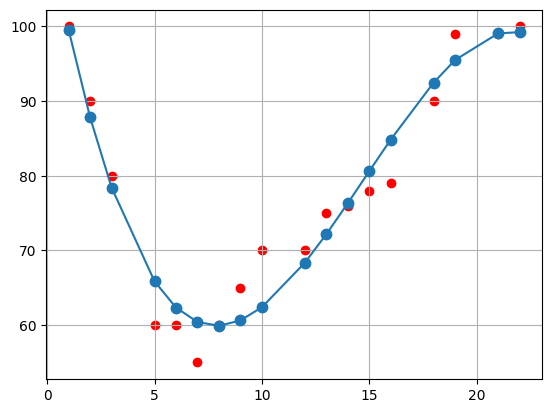

In [47]:
plt.scatter(x, y, color="r")
plt.plot(x, preds, marker=".", markersize=15)
plt.grid()

In [48]:
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)
mse, mae, r2

(12.473061469757207, 2.7764586193798895, 0.9432150416451026)